is_safe(board, row, col, n): This function checks if placing a queen at board[row][col] is safe by verifying no other queens are in the same row, column, or diagonal.

solve_nqueens_util(board, col, n, solutions): This function recursively tries to place queens column by column. If it successfully places all N queens, it adds the board configuration to the list of solutions.

solve_nqueens(n): This is the main function that initializes the board and calls the utility function to start solving the problem. It returns a list of all possible solutions.

visualize_nqueens(solution): This function takes a board configuration (solution) and visualizes it using matplotlib, displaying the board and placing the queens in the appropriate positions.

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
def is_safe(board, row, col, n):
    # Check this row on left side
    for i in range(col):
        if board[row][i] == 1:
            return False
    
    # Check upper diagonal on left side
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False
    
    # Check lower diagonal on left side
    for i, j in zip(range(row, n, 1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False
    
    return True

def solve_nqueens_util(board, col, n, solutions):
    # If all queens are placed
    if col >= n:
        solutions.append([row[:] for row in board])
        return True
    
    res = False
    for i in range(n):
        if is_safe(board, i, col, n):
            # Place this queen in board[i][col]
            board[i][col] = 1
            # Recur to place rest of the queens
            res = solve_nqueens_util(board, col + 1, n, solutions) or res
            # If placing queen in board[i][col] doesn't lead to a solution
            # then remove queen from board[i][col]
            board[i][col] = 0
    
    return res

def solve_nqueens(n):
    board = [[0 for _ in range(n)] for _ in range(n)]
    solutions = []
    solve_nqueens_util(board, 0, n, solutions)
    return solutions

# Example usage:
n = 4
solutions = solve_nqueens(n)
print(f"Number of solutions for {n}-Queens: {len(solutions)}")
for sol in solutions:
    for row in sol:
        print(row)
    print()


Number of solutions for 4-Queens: 2
[0, 0, 1, 0]
[1, 0, 0, 0]
[0, 0, 0, 1]
[0, 1, 0, 0]

[0, 1, 0, 0]
[0, 0, 0, 1]
[1, 0, 0, 0]
[0, 0, 1, 0]



In [23]:
def visualize_nqueens(solution):
    n = len(solution)
    board = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if solution[i][j] == 1:
                board[i][j] = 1
    
    fig, ax = plt.subplots()
    ax.matshow(board, cmap="binary")
    
    for i in range(n):
        for j in range(n):
            if solution[i][j] == 1:
                ax.text(j, i, 'Q', ha='center', va='center', color='red', fontsize=24)
    
    plt.xticks([])
    plt.yticks([])
    plt.show()

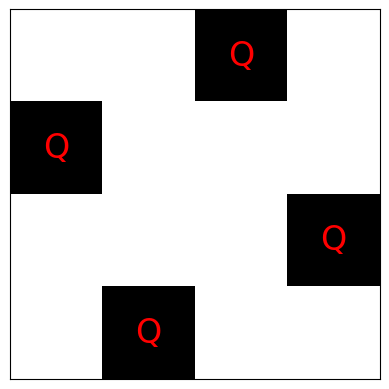

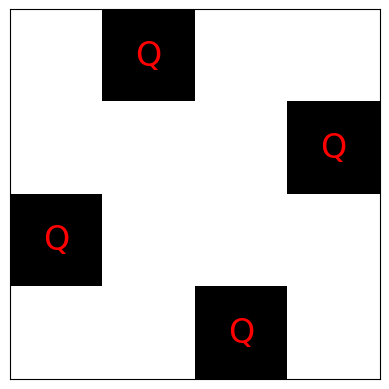

In [24]:
# Example usage:
for sol in solutions:
    visualize_nqueens(sol)